## 🌍 Project Title: Global Development Analysis:
**A Data-Driven Look at Economic, Health, and Climate Progress (2000–2020)**

This notebook explores development indicators for countries over time using clustering and machine learning to uncover meaningful patterns. It involves data cleaning, outlier handling, feature scaling, unsupervised learning (KMeans), and supervised learning (XGBoost).

## Setup the environment

In [1]:
# Load the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap
import xgboost as xgb
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
# Set random seed for reproducibility
np.random.seed(42)
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

## Load the data

In [2]:
# Load the dataset
df = pd.read_csv('/Users/root/Global_Development_Analysis/data/Global_Development_Indicators_2000_2020.csv')
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
# Display the first few rows of the DataFrame
df.head()

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,calculated_gdp_per_capita,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,7.724844,1.558123,358460.646325,733.421542,65.132445,33.980631,20.086007,51.276129,137.544991,NaN,6.252428,NaN,NaN,0.743922,2.515358,713.245921,82.921252,256.622322,0.900399,1.262396,65.132445,2.742396,8.880629,0.0,0.0,0.136793,0.372795,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,7.732945,4.837769,397075.660289,738.822493,65.568145,38.903980,23.103178,51.606458,132.129631,NaN,6.390628,NaN,NaN,0.930780,3.460505,633.608789,108.488080,227.849836,0.971981,1.534039,65.568145,3.150217,8.874682,0.0,0.0,0.179471,0.390574,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,7.959582,2.503637,409057.179216,726.210303,64.578854,38.703207,24.223430,52.043149,126.463328,NaN,5.969417,NaN,NaN,1.106896,4.562979,631.870340,72.100439,223.966387,0.975749,1.544224,64.578854,3.110227,8.892583,0.0,0.0,0.224739,0.411528,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,7.787965,2.488972,434533.137679,739.607835,64.103145,38.502435,25.023184,52.585853,120.834827,NaN,6.635665,NaN,NaN,1.408190,6.031837,819.743981,110.037178,293.742130,1.009963,1.232047,64.103145,3.082676,8.667180,0.0,0.0,0.291444,0.435188,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,7.310328,1.866596,466883.238781,756.945360,63.216180,37.899951,26.176336,53.228913,115.404354,NaN,6.710734,NaN,NaN,1.716791,7.949497,993.762711,197.825899,367.548165,1.057182,1.063817,63.216180,3.013372,8.351485,0.0,0.0,0.369427,0.461238,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022


## Data Inspection

In [3]:
# Display the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 5556 non-null   int64  
 1   country_code                         5556 non-null   object 
 2   country_name                         5556 non-null   object 
 3   region                               4548 non-null   object 
 4   income_group                         4527 non-null   object 
 5   currency_unit                        4548 non-null   object 
 6   gdp_usd                              5332 non-null   float64
 7   population                           5556 non-null   float64
 8   gdp_per_capita                       5332 non-null   float64
 9   inflation_rate                       4746 non-null   float64
 10  unemployment_rate                    4926 non-null   float64
 11  fdi_pct_gdp                   

In [4]:
# Display the columns of the DataFrame
df.columns

Index(['year', 'country_code', 'country_name', 'region', 'income_group',
       'currency_unit', 'gdp_usd', 'population', 'gdp_per_capita',
       'inflation_rate', 'unemployment_rate', 'fdi_pct_gdp',
       'co2_emissions_kt', 'energy_use_per_capita', 'renewable_energy_pct',
       'forest_area_pct', 'electricity_access_pct', 'life_expectancy',
       'child_mortality', 'school_enrollment_secondary',
       'health_expenditure_pct_gdp', 'hospital_beds_per_1000',
       'physicians_per_1000', 'internet_usage_pct',
       'mobile_subscriptions_per_100', 'calculated_gdp_per_capita',
       'real_economic_growth_indicator', 'econ_opportunity_index',
       'co2_emissions_per_capita_tons', 'co2_intensity_per_million_gdp',
       'green_transition_score', 'ecological_preservation_index',
       'renewable_energy_efficiency', 'human_development_composite',
       'healthcare_capacity_index', 'digital_connectivity_index',
       'health_development_ratio', 'education_health_ratio',
       'ye

In [5]:
# Display the number of unique values in each column
print(df.nunique())

year                                     21
country_code                            265
country_name                            265
region                                    7
income_group                              4
currency_unit                           152
gdp_usd                                5294
population                             5511
gdp_per_capita                         5294
inflation_rate                         4204
unemployment_rate                      3656
fdi_pct_gdp                            4958
co2_emissions_kt                       3245
energy_use_per_capita                  2879
renewable_energy_pct                   4507
forest_area_pct                        4361
electricity_access_pct                 2995
life_expectancy                        4658
child_mortality                        1929
school_enrollment_secondary            3713
health_expenditure_pct_gdp             4628
hospital_beds_per_1000                 1276
physicians_per_1000             

In [6]:
# Check for missing values
df.isna().sum()

year                                      0
country_code                              0
country_name                              0
region                                 1008
income_group                           1029
currency_unit                          1008
gdp_usd                                 224
population                                0
gdp_per_capita                          224
inflation_rate                          810
unemployment_rate                       630
fdi_pct_gdp                             545
co2_emissions_kt                       1022
energy_use_per_capita                  2621
renewable_energy_pct                    748
forest_area_pct                         113
electricity_access_pct                  401
life_expectancy                         600
child_mortality                         504
school_enrollment_secondary            1800
health_expenditure_pct_gdp              870
hospital_beds_per_1000                 2873
physicians_per_1000             

In [7]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
# Display basic statistics of the DataFrame
df.describe()

,year,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,calculated_gdp_per_capita,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
count,5556.000000,5.332000e+03,5.556000e+03,5332.000000,4746.000000,4926.000000,5011.000000,4.534000e+03,2935.000000,4808.000000,5443.000000,5155.000000,4956.000000,5052.000000,3756.000000,4686.000000,2683.000000,2271.000000,4844.000000,5172.000000,5332.000000,4.717000e+03,4827.000000,4534.000000,4474.000000,4808.000000,5443.000000,2935.000000,4956.000000,4686.000000,5556.000000,4638.000000,3619.000000,5556.000000,5556.000000,5556.000000,4956.000000,5556.000000,5556.000000,5556.0,4831.000000,5556.000000
mean,2009.990281,2.008355e+12,2.803412e+08,13795.817996,5.672921,7.931009,8.257269,1.121548e+06,2348.102738,30.136454,32.321885,80.043142,69.793654,41.200625,78.452336,6.160078,3.562050,2.149122,32.528044,73.725415,13769.161125,-1.092543e+07,5266.682142,4.282983,0.675197,30.136454,1.423242,6.451143,0.387345,32.689495,4.028989,5.692028,8.114421,9.990281,9.990281,0.047516,0.655851,0.355641,0.370564,0.5,0.444183,37.855834
std,6.055035,7.293769e+12,8.833686e+08,21800.211655,17.187940,5.699083,57.781167,3.581651e+06,2792.390775,29.057442,23.071773,28.747153,8.913867,41.054950,28.222788,2.740922,2.509637,1.757135,29.280355,49.096935,21787.657795,7.506424e+08,11077.983227,5.087580,0.826480,29.057442,1.609097,20.840421,0.377695,73.501408,3.721305,6.932960,10.248196,6.055035,6.055035,0.212759,0.268073,0.098701,0.293003,0.0,0.279515,17.955257
min,2000.000000,1.319654e+07,9.392000e+03,111.927225,-18.108630,0.100000,-1275.189986,0.000000e+00,9.548060,0.000000,0.000000,1.270180,39.441000,1.800000,5.932350,1.263576,0.010000,0.011000,0.000000,0.000000,111.927225,-5.155443e+10,35.587193,0.000000,0.000000,0.000000,0.000000,0.000000,-0.327282,0.000000,0.000000,0.175371,0.029310,0.000000,0.000000,0.000000,-0.259046,0.046064,0.000000,0.5,-2.748146,-3.503647
25%,2005.000000,6.030846e+09,1.362497e+06,1444.894654,1.747407,4.212000,1.415803,2.652500e+03,632.680016,5.367450,12.430556,65.045232,64.200000,9.800000,59.522323,4.263578,1.684286,0.617800,5.812336,29.518880,1447.592976,1.899746e+02,559.668720,0.770907,0.286294,5.367450,0.039212,0.237954,0.000000,0.000000,0.385371,0.951837,1.017732,5.000000,5.000000,0.000000,0.477012,0.279549,0.094469,0.5,0.348435,25.202170
50%,2010.000000,3.792200e+10,9.460952e+06,4613.064890,3.380922,6.255931,2.813815,2.641000e+04,1327.504416,20.092950,30.899797,97.719337,71.872427,24.400000,84.967117,5.457369,2.900000,1.936300,23.702222,77.051962,4613.064890,9.385666e+02,1491.746378,2.573137,0.454665,20.092950,1.027347,1.081401,0.370544,0.000000,3.151044,2.855282,3.804778,10.000000,10.000000,0.000000,0.675748,0.367475,0.332576,0.5,0.427601,36.723178
75%,2015.000000,4.327084e+11,5.915911e+07,16338.372784,6.131023,10.218439,5.302534,2.868350e+05,3060.161582,50.831100,46.758024,100.000000,76.287750,63.012560,98.876171,7.711664,5.155000,3.250300,56.843175,111.122896,16319.699011,4.888213e+03,4922.097555,6.202984,0.789313,50.831100,2.175813,8.274791,0.745156,15.649725,7.317161,7.417214,11.065525,15.000000,15.000000,0.000000,0.892256,0.436504,0.617325,0.5,0.566467,49.454992
max,2020.000000,8.756805e+13,7.761620e+09,189

Based on the initial analysis we will drop some columns as the columns have lots of missing info and does not contribute to further analysis

In [9]:
# Drop unnecessary columns 
drop_columns = [
    'currency_unit',                        # Redundant for numerical analysis; doesn't contribute to modeling.
    'calculated_gdp_per_capita',           # Likely derived from GDP and population; avoiding multicollinearity.
    'governance_quality_index',            # Highly correlated with other composite indexes; dropped to reduce redundancy.
    'global_development_resilience_index'  # Aggregated composite; better to use its component indicators directly.
]

df = df.drop(columns=drop_columns)
df.head()

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,7.724844,1.558123,358460.646325,733.421542,65.132445,33.980631,20.086007,51.276129,137.544991,NaN,6.252428,NaN,NaN,0.743922,2.515358,82.921252,256.622322,0.900399,1.262396,65.132445,2.742396,8.880629,0.0,0.0,0.136793,0.372795,NaN,0,0,0,0.075174,0.252217,0.012104,0.134733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,7.732945,4.837769,397075.660289,738.822493,65.568145,38.903980,23.103178,51.606458,132.129631,NaN,6.390628,NaN,NaN,0.930780,3.460505,108.488080,227.849836,0.971981,1.534039,65.568145,3.150217,8.874682,0.0,0.0,0.179471,0.390574,NaN,1,1,0,0.094327,0.238820,0.016189,0.067481
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,7.959582,2.503637,409057.179216,726.210303,64.578854,38.703207,24.223430,52.043149,126.463328,NaN,5.969417,NaN,NaN,1.106896,4.562979,72.100439,223.966387,0.975749,1.544224,64.578854,3.110227,8.892583,0.0,0.0,0.224739,0.411528,NaN,2,2,0,0.114721,0.241795,0.020744,0.066218
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,7.787965,2.488972,434533.137679,739.607835,64.103145,38.502435,25.023184,52.585853,120.834827,NaN,6.635665,NaN,NaN,1.408190,6.031837,110.037178,293.742130,1.009963,1.232047,64.103145,3.082676,8.667180,0.0,0.0,0.291444,0.435188,NaN,3,3,0,0.135402,0.243486,0.027147,0.146931
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,7.310328,1.866596,466883.238781,756.945360,63.216180,37.899951,26.176336,53.228913,115.404354,NaN,6.710734,NaN,NaN,1.716791,7.949497,197.825899,367.548165,1.057182,1.063817,63.216180,3.013372,8.351485,0.0,0.0,0.369427,0.461238,NaN,4,4,0,0.155819,0.247210,0.035082,0.191834


In [10]:
# Convert 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df.head()

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,7.724844,1.558123,358460.646325,733.421542,65.132445,33.980631,20.086007,51.276129,137.544991,NaN,6.252428,NaN,NaN,0.743922,2.515358,82.921252,256.622322,0.900399,1.262396,65.132445,2.742396,8.880629,0.0,0.0,0.136793,0.372795,NaN,0,0,0,0.075174,0.252217,0.012104,0.134733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,7.732945,4.837769,397075.660289,738.822493,65.568145,38.903980,23.103178,51.606458,132.129631,NaN,6.390628,NaN,NaN,0.930780,3.460505,108.488080,227.849836,0.971981,1.534039,65.568145,3.150217,8.874682,0.0,0.0,0.179471,0.390574,NaN,1,1,0,0.094327,0.238820,0.016189,0.067481
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,7.959582,2.503637,409057.179216,726.210303,64.578854,38.703207,24.223430,52.043149,126.463328,NaN,5.969417,NaN,NaN,1.106896,4.562979,72.100439,223.966387,0.975749,1.544224,64.578854,3.110227,8.892583,0.0,0.0,0.224739,0.411528,NaN,2,2,0,0.114721,0.241795,0.020744,0.066218
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,7.787965,2.488972,434533.137679,739.607835,64.103145,38.502435,25.023184,52.585853,120.834827,NaN,6.635665,NaN,NaN,1.408190,6.031837,110.037178,293.742130,1.009963,1.232047,64.103145,3.082676,8.667180,0.0,0.0,0.291444,0.435188,NaN,3,3,0,0.135402,0.243486,0.027147,0.146931
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,7.310328,1.866596,466883.238781,756.945360,63.216180,37.899951,26.176336,53.228913,115.404354,NaN,6.710734,NaN,NaN,1.716791,7.949497,197.825899,367.548165,1.057182,1.063817,63.216180,3.013372,8.351485,0.0,0.0,0.369427,0.461238,NaN,4,4,0,0.155819,0.247210,0.035082,0.191834


In [11]:
# Display the unique values in the 'region' column
df['region'].unique()

array([nan, 'East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

In [12]:
# Display the unique values in the 'country_code' column
df['country_code'].unique()

array(['AFE', 'AFW', 'ARB', 'CEB', 'CSS', 'EAP', 'EAR', 'EAS', 'ECA',
       'ECS', 'EMU', 'EUU', 'FCS', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA',
       'IDB', 'IDX', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'LTE',
       'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSS', 'PST',
       'SAS', 'SSA', 'SSF', 'SST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA',
       'TSS', 'UMC', 'WLD', 'ASM', 'AUS', 'BRN', 'CHN', 'FJI', 'FSM',
       'GUM', 'HKG', 'IDN', 'JPN', 'KHM', 'KIR', 'KOR', 'LAO', 'MAC',
       'MHL', 'MMR', 'MNG', 'MNP', 'MYS', 'NCL', 'NRU', 'NZL', 'PHL',
       'PLW', 'PNG', 'PRK', 'PYF', 'SGP', 'SLB', 'THA', 'TLS', 'TON',
       'TUV', 'VNM', 'VUT', 'WSM', 'ALB', 'AND', 'ARM', 'AUT', 'AZE',
       'BEL', 'BGR', 'BIH', 'BLR', 'CHE', 'CHI', 'CYP', 'CZE', 'DEU',
       'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'FRO', 'GBR', 'GEO', 'GIB',
       'GRC', 'GRL', 'HRV', 'HUN', 'IMN', 'IRL', 'ISL', 'ITA', 'KAZ',
       'KGZ', 'LIE', 'LTU', 'LUX', 'LVA', 'MCO', 'MDA', 'MKD', 'MNE',
       'NLD', 'NOR',

As the data we have mixed information about countries, world data, regions and income groups we will divide the data into three groups as information about individual countries and regions and world which is a aggregated data

In [13]:
# Define World Bank regional/aggregate codes & country codes
# These codes are used to categorize countries and regions in the dataset
region_codes = {
    'AFE', 'AFW', 'ARB', 'CEB', 'CSS', 'EAP', 'EAR', 'EAS', 'ECA',
    'ECS', 'EMU', 'EUU', 'FCS', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA',
    'IDB', 'IDX', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'LTE',
    'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSS', 'PST',
    'SAS', 'SSA', 'SSF', 'SST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA',
    'TSS', 'UMC'
}

country_codes = {
    'ASM', 'AUS', 'BRN', 'CHN', 'FJI', 'FSM', 'GUM', 'HKG', 'IDN', 'JPN', 'KHM', 'KIR', 'KOR',
    'LAO', 'MAC', 'MHL', 'MMR', 'MNG', 'MNP', 'MYS', 'NCL', 'NRU', 'NZL', 'PHL', 'PLW', 'PNG',
    'PRK', 'PYF', 'SGP', 'SLB', 'THA', 'TLS', 'TON', 'TUV', 'VNM', 'VUT', 'WSM', 'ALB', 'AND',
    'ARM', 'AUT', 'AZE', 'BEL', 'BGR', 'BIH', 'BLR', 'CHE', 'CHI', 'CYP', 'CZE', 'DEU', 'DNK',
    'ESP', 'EST', 'FIN', 'FRA', 'FRO', 'GBR', 'GEO', 'GIB', 'GRC', 'GRL', 'HRV', 'HUN', 'IMN',
    'IRL', 'ISL', 'ITA', 'KAZ', 'KGZ', 'LIE', 'LTU', 'LUX', 'LVA', 'MCO', 'MDA', 'MKD', 'MNE',
    'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'SWE', 'TJK', 'TKM',
    'TUR', 'UKR', 'UZB', 'XKX', 'ABW', 'ARG', 'ATG', 'BHS', 'BLZ', 'BOL', 'BRA', 'BRB', 'CHL',
    'COL', 'CRI', 'CUB', 'CUW', 'CYM', 'DMA', 'DOM', 'ECU', 'GRD', 'GTM', 'GUY', 'HND', 'HTI',
    'JAM', 'KNA', 'LCA', 'MAF', 'MEX', 'NIC', 'PAN', 'PER', 'PRI', 'PRY', 'SLV', 'SUR', 'SXM',
    'TCA', 'TTO', 'URY', 'VCT', 'VEN', 'VGB', 'VIR', 'ARE', 'BHR', 'DJI', 'DZA', 'EGY', 'IRN',
    'IRQ', 'ISR', 'JOR', 'KWT', 'LBN', 'LBY', 'MAR', 'MLT', 'OMN', 'PSE', 'QAT', 'SAU', 'SYR',
    'TUN', 'YEM', 'BMU', 'CAN', 'USA', 'AFG', 'BGD', 'BTN', 'IND', 'LKA', 'MDV', 'NPL', 'PAK',
    'AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD', 'COG', 'COM', 'CPV', 'ERI',
    'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
    'MRT', 'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE', 'SOM', 'SSD', 'STP',
    'SWZ', 'SYC', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF', 'ZMB', 'ZWE'
}

df_world = df[df['country_code'] == 'WLD'] 
print('Missing values in GDP col:', df_world['gdp_usd'].isna().sum())
print('\n', df_world[['year', 'gdp_usd']])

Missing values in GDP col: 0

       year       gdp_usd
987   2000  3.381597e+13
988   2001  3.360921e+13
989   2002  3.488437e+13
990   2003  3.912864e+13
991   2004  4.409586e+13
992   2005  4.777398e+13
993   2006  5.176942e+13
994   2007  5.832135e+13
995   2008  6.401446e+13
996   2009  6.073036e+13
997   2010  6.648828e+13
998   2011  7.365375e+13
999   2012  7.531228e+13
1000  2013  7.743951e+13
1001  2014  7.955766e+13
1002  2015  7.511244e+13
1003  2016  7.630506e+13
1004  2017  8.119329e+13
1005  2018  8.626760e+13
1006  2019  8.756805e+13
1007  2020  8.474698e+13


In [14]:
# Filter the DataFrame to include only rows with region codes
df_regions = df[df['country_code'].isin(region_codes)]
df_regions.head()

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,7.724844,1.558123,358460.646325,733.421542,65.132445,33.980631,20.086007,51.276129,137.544991,NaN,6.252428,NaN,NaN,0.743922,2.515358,82.921252,256.622322,0.900399,1.262396,65.132445,2.742396,8.880629,0.0,0.0,0.136793,0.372795,NaN,0,0,0,0.075174,0.252217,0.012104,0.134733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,7.732945,4.837769,397075.660289,738.822493,65.568145,38.903980,23.103178,51.606458,132.129631,NaN,6.390628,NaN,NaN,0.930780,3.460505,108.488080,227.849836,0.971981,1.534039,65.568145,3.150217,8.874682,0.0,0.0,0.179471,0.390574,NaN,1,1,0,0.094327,0.238820,0.016189,0.067481
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,7.959582,2.503637,409057.179216,726.210303,64.578854,38.703207,24.223430,52.043149,126.463328,NaN,5.969417,NaN,NaN,1.106896,4.562979,72.100439,223.966387,0.975749,1.544224,64.578854,3.110227,8.892583,0.0,0.0,0.224739,0.411528,NaN,2,2,0,0.114721,0.241795,0.020744,0.066218
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,7.787965,2.488972,434533.137679,739.607835,64.103145,38.502435,25.023184,52.585853,120.834827,NaN,6.635665,NaN,NaN,1.408190,6.031837,110.037178,293.742130,1.009963,1.232047,64.103145,3.082676,8.667180,0.0,0.0,0.291444,0.435188,NaN,3,3,0,0.135402,0.243486,0.027147,0.146931
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,7.310328,1.866596,466883.238781,756.945360,63.216180,37.899951,26.176336,53.228913,115.404354,NaN,6.710734,NaN,NaN,1.716791,7.949497,197.825899,367.548165,1.057182,1.063817,63.216180,3.013372,8.351485,0.0,0.0,0.369427,0.461238,NaN,4,4,0,0.155819,0.247210,0.035082,0.191834


In [15]:
# Filter the DataFrame to include only rows with country codes
df_countries = df[df['country_code'].isin(country_codes)]
df_countries_analysis = df_countries.copy()
df_countries_cluster_analysis = df_countries.copy()
df_countries

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
1008,2000,ASM,American Samoa,East Asia & Pacific,Upper middle income,NaN,57816.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,88.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.445115,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0,0,0,NaN,0.278375,0.011484,NaN
1009,2001,ASM,American Samoa,East Asia & Pacific,Upper middle income,NaN,58496.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,88.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.685848,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1,1,0,NaN,0.278750,0.012286,NaN
1010,2002,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.120000e+08,59077.0,8666.655382,NaN,NaN,NaN,NaN,NaN,0.000000,88.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.446175,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,2,2,0,NaN,0.279125,0.011487,NaN
1011,2003,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.240000e+08,59495.0,8807.462812,NaN,NaN,NaN,NaN,NaN,0.000000,88.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.529175,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3,3,0,NaN,0.279500,0.011764,NaN
1012,2004,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.090000e+08,59684.0,8528.248777,NaN,NaN,NaN,NaN,NaN,0.000000,88.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770044,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,4,4,0,NaN,0.279875,0.012567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,2.054868e+10,14030338.0,1464.588957,-1.543670,4.788,1.669274,10990.0,NaN,82.792603,45.570273,39.676228,60.294,58.7,NaN,7.675163,NaN,0.1788,23.119989,91.793458,-948.771004,669.327517,0.783303,0.534828,82.792603,4.146459,NaN,0.0,0.0,4.606803,1.027155,NaN,16,16,0,0.370373,0.179093,0.421578,0.375164
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.758489e+10,14236599.0,1235.189032,0.893962,4.785,1.746885,10230.0,NaN,83.492996,45.451183,40.144283,60.812,57.0,NaN,7.469752,NaN,0.1859,24.400000,98.985073,1381.701454,564.667071,0.718570,0.581749,83.492996,4.153079,NaN,0.0,0.0,4.914505,1.066877,NaN,17,17,0,0.377994,0.177640,0.451950,0.365426
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.811554e+10,14438812.0,1254.642265,10.618866,4.796,3.962704,12270.0,NaN,81.363602,45.332093,40.616360,61.195,54.8,NaN,8.680062,NaN,0.2096,25.000000,89.404869,118.152191,572.901984,0.849793,0.677319,81.363602,4.089035,NaN,0.0,0.0,4.727707,1.116697,NaN,18,18,0,0.386741,0.183261,0.423016,0.343432
5554,2019,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.928429e+10,14645473.0,1316.740657,255.304991,4.833,1.293799,NaN,NaN,NaN,45.213002,41.089108,61.490,54.2,NaN,7.703565,NaN,NaN,25.100000,90.102290,5.157520,598.951752,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,4.755594,1.134502,NaN,19,19,0,0.389866,0.386967,0.425841,0.513916


In [16]:
# Display the shape of each DataFrame
print('Shape of df_world:', df_world.shape)
print('Shape of df_regions:', df_regions.shape)
print('Shape of df_countries:', df_countries.shape)

Shape of df_world: (21, 43)
Shape of df_regions: (987, 43)
Shape of df_countries: (4548, 43)


## Exploratory Data Analysis for Countries

### Economic Indicators for Countries

In [17]:
# Find the latest year in the dataset
latest_year = df_countries['year'].max()

# Filter data for the latest year
df_latest_year = df_countries[df_countries['year'] == latest_year]

# Get top 5 countries by GDP in the latest year
top5_countries_latest = df_latest_year.sort_values(by='gdp_usd', ascending=False).head(5)['country_code'].tolist()

# Filter full dataset for these top 5 countries across all years
df_top5_latest = df_countries[df_countries['country_code'].isin(top5_countries_latest)]

# Plot using Plotly
fig = px.line(
    df_top5_latest,
    x='year',
    y='gdp_usd',
    color='country_code',
    title=f'GDP (USD) Over Time - Top 5 Countries by GDP in {latest_year}',
    labels={'gdp_usd': 'GDP (USD)', 'year': 'Year', 'country_code': 'Country Code'},
    log_y=True
)
fig.show()


In [18]:
# Get the latest year
latest_year = df_countries['year'].max()

# Filter data for the latest year
df_latest = df_countries[df_countries['year'] == latest_year]

# Get top 5 countries by GDP per capita
top_5_gdp_pc = df_latest.sort_values('gdp_per_capita', ascending=False).head(5)

# Plot using Plotly
fig = px.bar(
    top_5_gdp_pc,
    x='gdp_per_capita',
    y='country_code',
    orientation='h',
    title=f'Top 5 Countries by GDP per Capita in {latest_year}',
    labels={'gdp_per_capita': 'GDP per Capita (USD)', 'country_code': 'Country Code'},
    text='gdp_per_capita'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=400)
fig.show()

### Population & Social Indicators


In [19]:
# Get the latest year in your dataset
latest_year = df_countries['year'].max()

# Filter data for the latest year only
df_latest = df_countries[df_countries['year'] == latest_year]

# Get top 5 countries by GDP in the latest year
top5_gdp_countries = df_latest.sort_values(by='gdp_usd', ascending=False).head(5)['country_code'].tolist()

# Filter the main dataframe to include only these top 5 countries across all years
df_top5 = df_countries[df_countries['country_code'].isin(top5_gdp_countries)]

# Plot population over time using Plotly
fig = px.line(
    df_top5,
    x='year',
    y='population',
    color='country_code',
    title=f'Population Over Time for Top 5 Countries by GDP in {latest_year}',
    labels={'population': 'Population', 'year': 'Year', 'country_code': 'Country Code'}
)

fig.update_layout(
    yaxis_title='Population',
    xaxis_title='Year',
    legend_title='Country Code',
    template='plotly_white'
)
fig.show()

### Life Expectancy vs Health Expenditure (% of GDP)

In [20]:
# Create a scatter plot using Plotly Express
fig = px.scatter(
    df_countries,  # Dataset to use
    x='health_expenditure_pct_gdp',  # X-axis: Health expenditure as % of GDP
    y='life_expectancy',             # Y-axis: Life expectancy in years
    color='income_group',            # Color points by income group
    title='Life Expectancy vs Health Expenditure (% of GDP)',  # Plot title
    labels={                         # Axis and legend labels
        'health_expenditure_pct_gdp': 'Health Expenditure (% of GDP)',
        'life_expectancy': 'Life Expectancy (years)',
        'income_group': 'Income Group'
    },
    hover_name='country_name',       # Show country name on hover
    template='plotly_white'          # Use a clean white template for visuals
)

# Customize marker appearance: set size and border color
fig.update_traces(
    marker=dict(
        size=8,                     # Marker size
        line=dict(
            width=0.5,              # Border width
            color='DarkSlateGrey'   # Border color
        )
    )
)
# Update legend title for clarity
fig.update_layout(legend_title='Income Group')
# Display the plot
fig.show()

### Environmental Indicators

In [21]:
# Get the latest year
latest_year = df_countries['year'].max()

# Filter data for the latest year
df_latest = df_countries[df_countries['year'] == latest_year]

# Drop rows with missing GDP values
df_latest_gdp = df_latest.dropna(subset=['gdp_usd'])

# Get top 5 countries by GDP
top_gdp_countries = df_latest_gdp.sort_values(by='gdp_usd', ascending=False).head(5)['country_code'].tolist()
print("Top 5 GDP countries:", top_gdp_countries)

# Filter original dataframe for these countries
df_top_gdp_countries = df_countries[df_countries['country_code'].isin(top_gdp_countries)]

# Plot CO2 emissions over time using Plotly
fig = px.line(
    df_top_gdp_countries,
    x='year',
    y='co2_emissions_kt',
    color='country_code',
    title='CO₂ Emissions (kt) Over Time for Top 5 GDP Countries',
    labels={
        'year': 'Year',
        'co2_emissions_kt': 'CO₂ Emissions (kt)',
        'country_code': 'Country Code'
    },
    template='plotly_white'
)

fig.update_layout(legend_title='Country Code')
fig.show()


Top 5 GDP countries: ['USA', 'CHN', 'JPN', 'DEU', 'GBR']


### Digital & Connectivity

 Internet Usage Over Time (Line plot)

In [22]:
# Get the latest year
latest_year = df_countries['year'].max()

# Find top 5 countries by GDP in the latest year
top5_gdp_countries = (
    df_countries[df_countries['year'] == latest_year]
    .sort_values('gdp_usd', ascending=False)
    .head(5)['country_code']
    .tolist()
)

# Filter full dataset for those countries
df_top5_gdp = df_countries[df_countries['country_code'].isin(top5_gdp_countries)]

# Plot Internet Usage Over Time with Plotly
fig = px.line(
    df_top5_gdp,
    x='year',
    y='internet_usage_pct',
    color='country_code',
    title='Internet Usage (%) Over Time - Top 5 Countries by GDP',
    labels={
        'year': 'Year',
        'internet_usage_pct': 'Internet Usage (%)',
        'country_code': 'Country Code'
    },
    template='plotly_white'
)

fig.update_layout(legend_title='Country Code')
fig.show()

# Exploratory Data Analysis for Regions

### Economic Indicators for Regions

In [23]:
# Latest year in regions dataset
latest_year = df_regions['year'].max()

# Filter for latest year
df_latest_regions = df_regions[df_regions['year'] == latest_year]

# Top 5 regions by GDP in latest year
top5_regions_gdp = df_latest_regions.sort_values(by='gdp_usd', ascending=False).head(5)['country_code'].tolist()

# Filter all years for top 5 regions by GDP
df_top5_regions_gdp = df_regions[df_regions['country_code'].isin(top5_regions_gdp)]

fig = px.line(
    df_top5_regions_gdp,
    x='year', y='gdp_usd', color='country_code',
    title=f'GDP (USD) Over Time - Top 5 Regions by GDP in {latest_year}',
    labels={'gdp_usd': 'GDP (USD)', 'year': 'Year', 'country_code': 'Region Code'},
    log_y=True
)
fig.show()

In [24]:
# Top 5 regions by GDP per capita in latest year
top5_regions_gdp_pc = df_latest_regions.sort_values(by='gdp_per_capita', ascending=True).head(5)

fig = px.bar(
    top5_regions_gdp_pc,
    y='country_code', x='gdp_per_capita',
    orientation='h',
    title=f'Top 5 Regions by GDP per Capita in {latest_year}',
    labels={'gdp_per_capita': 'GDP per Capita (USD)', 'country_code': 'Region Code'}
)
fig.show()

### Population & Social Indicators

In [25]:
# Population over time for top 5 GDP regions
fig = px.line(
    df_top5_regions_gdp,
    x='year', y='population', color='country_code',
    title=f'Population Over Time - Top 5 Regions by GDP in {latest_year}',
    labels={'population': 'Population', 'year': 'Year', 'country_code': 'Region Code'}
)
fig.show()

### Environmental Indicators

In [26]:
# CO2 emissions over time for top 5 GDP regions
fig = px.line(
    df_top5_regions_gdp,
    x='year', y='co2_emissions_kt', color='country_code',
    title='CO2 Emissions (kt) Over Time - Top 5 Regions by GDP',
    labels={'co2_emissions_kt': 'CO2 Emissions (kt)', 'year': 'Year', 'country_code': 'Region Code'}
)
fig.show()

### Digital & Connectivity

 Internet Usage Over Time (Line plot)

In [27]:
# Internet usage over time for top 5 GDP regions
fig = px.line(
    df_top5_regions_gdp,
    x='year', y='internet_usage_pct', color='country_code',
    title='Internet Usage (%) Over Time - Top 5 Regions by GDP',
    labels={'internet_usage_pct': 'Internet Usage (%)', 'year': 'Year', 'country_code': 'Region Code'}
)
fig.show()

# Exploratory Analysis World Data

In [28]:
# Plot global GDP over time
fig = px.line(
    df_world,
    x='year',
    y='gdp_usd',
    title='Global GDP Over Time',
    labels={'gdp_usd': 'GDP (USD)', 'year': 'Year'},
    log_y=True
)
fig.show()

In [29]:
# Plot global GDP per capita over time
fig = px.line(
    df_world,
    x='year',
    y='co2_emissions_kt',
    title='Global CO2 Emissions Over Time',
    labels={'co2_emissions_kt': 'CO2 Emissions (kt)', 'year': 'Year'}
)
fig.show()

In [30]:
fig = px.line(
    df_world,
    x='year',
    y='life_expectancy',
    title='Global Life Expectancy Over Time',
    labels={'life_expectancy': 'Life Expectancy (years)', 'year': 'Year'}
)
fig.show()

# Data Cleaning and Preprocessing

In [31]:
df_world

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
987,2000,WLD,World,NaN,NaN,3.381597e+13,6.114324e+09,5530.613892,3.494465,5.769081,4.612148,2.331181e+07,1637.205968,17.854914,31.170690,78.736034,67.549020,75.8,59.928730,8.630177,2.906446,1.531052,6.733880,12.042666,1582.678301,2302.608099,3.812655,0.689373,17.854914,1.317120,1.090572,0.148879,38.403602,0.900521,0.891148,0.790616,0,0,0,0.539874,0.377436,0.073812,0.349350
988,2001,WLD,World,NaN,NaN,3.360921e+13,6.193664e+09,5426.386204,3.838285,5.856253,2.661957,2.370726e+07,1636.490234,17.548531,31.135820,78.221629,67.821726,73.2,60.315552,9.026640,2.778952,NaN,8.059074,15.478120,1413.752943,2242.336544,3.827664,0.705380,17.548531,1.304310,1.072327,0.166073,0.000000,1.116868,0.926526,0.823983,1,1,0,0.550789,0.378289,0.091889,0.347456
989,2002,WLD,World,NaN,NaN,3.488437e+13,6.272724e+09,5561.278824,2.834423,6.074849,2.153174,2.405445e+07,1649.280759,17.561076,31.101204,79.397509,68.070348,70.5,61.197620,9.370108,2.676847,NaN,10.528369,18.516353,1962.049985,2256.352435,3.834769,0.689548,17.561076,1.303325,1.064772,0.184811,0.000000,1.396234,0.965537,0.868051,2,2,0,0.563575,0.378344,0.114363,0.356377
990,2003,WLD,World,NaN,NaN,3.912864e+13,6.351856e+09,6160.190409,3.032139,6.164370,1.861834,2.514394e+07,1688.480279,17.382897,31.066090,80.008678,68.326212,67.8,62.179070,9.517603,2.900459,NaN,12.209766,22.220427,2031.631613,2481.131621,3.958519,0.642597,17.382897,1.295232,1.029500,0.204102,0.000000,1.647138,1.007761,0.917095,3,3,0,0.576717,0.378878,0.135117,0.374234
991,2004,WLD,World,NaN,NaN,4.409586e+13,6.431527e+09,6856.204251,3.382647,6.001752,2.229413,2.631953e+07,1739.823237,17.090463,31.031363,80.160438,68.652624,65.4,63.161999,9.418870,NaN,NaN,14.098229,27.291555,2026.875585,2798.625088,4.092267,0.596871,17.090463,1.282856,0.982310,0.222097,0.000000,1.961537,1.049734,0.965780,4,4,0,0.589148,0.379695,0.161463,0.392746
992,2005,WLD,World,NaN,NaN,4.777398e+13,6.511725e+09,7336.609424,4.112184,5.898290,3.283109,2.732526e+07,1767.063170,16.915352,30.996238,80.161374,68.920304,62.5,64.092041,9.338337,2.641675,NaN,15.700099,33.766115,1784.115103,3020.872181,4.196316,0.571969,16.915352,1.274822,0.957258,0.243423,0.000000,2.302458,1.102725,1.025473,5,5,0,0.602827,0.380221,0.191054,0.404406
993,2006,WLD,World,NaN,NaN,5.176942e+13,6.592712e+09,7852.523635,4.282396,5.632652,4.254042,2.822354e+07,1796.644789,16.912665,30.971231,81.251031,69.262382,60.0,65.280357,9.258498,2.632674,NaN,17.480657,41.564005,1833.675248,3308.665001,4.281021,0.545178,16.912665,1.273692,0.941347,0.263348,0.000000,2.695489,1.154373,1.088006,6,6,0,0.616326,0.380290,0.225950,0.417159
994,2007,WLD,World,NaN,NaN,5.832135e+13,6.674182e+09,8738.352182,4.816768,5.416889,5.329539,2.931221e+07,1824.035298,16.764573,30.945030,82.204645,69.591690,57.6,66.939301,9.099392,2.684175,NaN,20.408495,50.262934,1814.152721,3754.521194,4.391881,0.502598,16.764573,1.267031,0.919093,0.284017,0.000000,3.202797,1.208189,1.162141,7,7,0,0.630999,0.380726,0.269586,0.437400
995,2008,WLD,World,NaN,NaN,6.401446e+13,6.757000e+09,9473.797796,8.952970,5.410319,3.798941,2.957492e+07,1829.629201,16.978339,30.922605,82.28426

In [32]:
# Check missing values per column
missing_counts = df_world.isna().sum()
missing_percent = (missing_counts / len(df_world)) * 100
missing_summary = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percent})
print(missing_summary.sort_values(by='missing_percent', ascending=False))

                                missing_count  missing_percent
income_group                               21       100.000000
region                                     21       100.000000
physicians_per_1000                        18        85.714286
energy_use_per_capita                       6        28.571429
renewable_energy_efficiency                 6        28.571429
renewable_energy_pct                        5        23.809524
green_transition_score                      5        23.809524
hospital_beds_per_1000                      4        19.047619
ecological_preservation_index               4        19.047619
forest_area_pct                             4        19.047619
co2_emissions_kt                            2         9.523810
co2_intensity_per_million_gdp               2         9.523810
co2_emissions_per_capita_tons               2         9.523810
education_health_ratio                      1         4.761905
health_development_ratio                    1         4

In [33]:
df_world = df_world.copy()  # Ensures it's an independent DataFrame
df_world.drop(['income_group', 'region', 'physicians_per_1000'], axis=1, inplace=True, errors='ignore')

In [34]:
# Convert columns with object dtype to appropriate numeric dtype where possible
df_world = df_world.infer_objects()

# Interpolate numeric columns (linear interpolation by default)
df_world.interpolate(method='linear', inplace=True)

# Forward fill remaining NaNs at start or middle
df_world.ffill(inplace=True)

# Backward fill any NaNs still remaining at the end
df_world.bfill(inplace=True)

In [35]:
df_world

,year,country_code,country_name,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
987,2000,WLD,World,3.381597e+13,6.114324e+09,5530.613892,3.494465,5.769081,4.612148,2.331181e+07,1637.205968,17.854914,31.170690,78.736034,67.549020,75.8,59.928730,8.630177,2.906446,6.733880,12.042666,1582.678301,2302.608099,3.812655,0.689373,17.854914,1.317120,1.090572,0.148879,38.403602,0.900521,0.891148,0.790616,0,0,0,0.539874,0.377436,0.073812,0.349350
988,2001,WLD,World,3.360921e+13,6.193664e+09,5426.386204,3.838285,5.856253,2.661957,2.370726e+07,1636.490234,17.548531,31.135820,78.221629,67.821726,73.2,60.315552,9.026640,2.778952,8.059074,15.478120,1413.752943,2242.336544,3.827664,0.705380,17.548531,1.304310,1.072327,0.166073,0.000000,1.116868,0.926526,0.823983,1,1,0,0.550789,0.378289,0.091889,0.347456
989,2002,WLD,World,3.488437e+13,6.272724e+09,5561.278824,2.834423,6.074849,2.153174,2.405445e+07,1649.280759,17.561076,31.101204,79.397509,68.070348,70.5,61.197620,9.370108,2.676847,10.528369,18.516353,1962.049985,2256.352435,3.834769,0.689548,17.561076,1.303325,1.064772,0.184811,0.000000,1.396234,0.965537,0.868051,2,2,0,0.563575,0.378344,0.114363,0.356377
990,2003,WLD,World,3.912864e+13,6.351856e+09,6160.190409,3.032139,6.164370,1.861834,2.514394e+07,1688.480279,17.382897,31.066090,80.008678,68.326212,67.8,62.179070,9.517603,2.900459,12.209766,22.220427,2031.631613,2481.131621,3.958519,0.642597,17.382897,1.295232,1.029500,0.204102,0.000000,1.647138,1.007761,0.917095,3,3,0,0.576717,0.378878,0.135117,0.374234
991,2004,WLD,World,4.409586e+13,6.431527e+09,6856.204251,3.382647,6.001752,2.229413,2.631953e+07,1739.823237,17.090463,31.031363,80.160438,68.652624,65.4,63.161999,9.418870,2.771067,14.098229,27.291555,2026.875585,2798.625088,4.092267,0.596871,17.090463,1.282856,0.982310,0.222097,0.000000,1.961537,1.049734,0.965780,4,4,0,0.589148,0.379695,0.161463,0.392746
992,2005,WLD,World,4.777398e+13,6.511725e+09,7336.609424,4.112184,5.898290,3.283109,2.732526e+07,1767.063170,16.915352,30.996238,80.161374,68.920304,62.5,64.092041,9.338337,2.641675,15.700099,33.766115,1784.115103,3020.872181,4.196316,0.571969,16.915352,1.274822,0.957258,0.243423,0.000000,2.302458,1.102725,1.025473,5,5,0,0.602827,0.380221,0.191054,0.404406
993,2006,WLD,World,5.176942e+13,6.592712e+09,7852.523635,4.282396,5.632652,4.254042,2.822354e+07,1796.644789,16.912665,30.971231,81.251031,69.262382,60.0,65.280357,9.258498,2.632674,17.480657,41.564005,1833.675248,3308.665001,4.281021,0.545178,16.912665,1.273692,0.941347,0.263348,0.000000,2.695489,1.154373,1.088006,6,6,0,0.616326,0.380290,0.225950,0.417159
994,2007,WLD,World,5.832135e+13,6.674182e+09,8738.352182,4.816768,5.416889,5.329539,2.931221e+07,1824.035298,16.764573,30.945030,82.204645,69.591690,57.6,66.939301,9.099392,2.684175,20.408495,50.262934,1814.152721,3754.521194,4.391881,0.502598,16.764573,1.267031,0.919093,0.284017,0.000000,3.202797,1.208189,1.162141,7,7,0,0.630999,0.380726,0.269586,0.437400
995,2008,WLD,World,6.401446e+13,6.757000e+09,9473.797796,8.952970,5.410319,3.798941,2.957492e+07,1829.629201,16.978339,30.922605,82.284268,69.899479,55.5,68.571007,9.092155,2.662690,23.075287,59.374966,1058.173721,4072.983564,4.376930,0.462004,16.978339,1.274159,0.927966,0.303030,

In [36]:
df_regions.isna().sum()

year                                0
country_code                        0
country_name                        0
region                            987
income_group                      987
gdp_usd                             0
population                          0
gdp_per_capita                      0
inflation_rate                      1
unemployment_rate                   0
fdi_pct_gdp                         0
co2_emissions_kt                   94
energy_use_per_capita             325
renewable_energy_pct              235
forest_area_pct                     0
electricity_access_pct             47
life_expectancy                    47
child_mortality                     0
school_enrollment_secondary        93
health_expenditure_pct_gdp         47
hospital_beds_per_1000            448
physicians_per_1000               856
internet_usage_pct                 47
mobile_subscriptions_per_100        9
real_economic_growth_indicator      1
econ_opportunity_index              0
co2_emission

In [37]:
df_regions.drop(['income_group', 'region', 'physicians_per_1000','hospital_beds_per_1000'], axis=1, inplace=True, errors='ignore')

In [38]:
# Sort by group and time first
df_regions = df_regions.sort_values(['country_code', 'year'])

# Find columns with NaNs
cols_with_nan = df_regions.columns[df_regions.isna().any()].tolist()

# Interpolate group-wise
for col in cols_with_nan:
    df_regions[col] = df_regions.groupby('country_code')[col]\
                       .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))

# Forward and backward fill group-wise using transform (not apply)
df_regions[cols_with_nan] = df_regions.groupby('country_code')[cols_with_nan]\
                               .transform(lambda group: group.ffill().bfill())
df_regions.isna().sum()

year                               0
country_code                       0
country_name                       0
gdp_usd                            0
population                         0
gdp_per_capita                     0
inflation_rate                     0
unemployment_rate                  0
fdi_pct_gdp                        0
co2_emissions_kt                   0
energy_use_per_capita             21
renewable_energy_pct               0
forest_area_pct                    0
electricity_access_pct             0
life_expectancy                    0
child_mortality                    0
school_enrollment_secondary       42
health_expenditure_pct_gdp         0
internet_usage_pct                 0
mobile_subscriptions_per_100       0
real_economic_growth_indicator     0
econ_opportunity_index             0
co2_emissions_per_capita_tons      0
co2_intensity_per_million_gdp      0
green_transition_score             0
ecological_preservation_index      0
renewable_energy_efficiency       21
h

In [39]:
remaining_nans = df_regions.isna().sum()
print(remaining_nans[remaining_nans > 0])

energy_use_per_capita          21
school_enrollment_secondary    42
renewable_energy_efficiency    21
education_health_ratio         42
dtype: int64


In [40]:
cols = ['energy_use_per_capita', 'school_enrollment_secondary', 'renewable_energy_efficiency', 'education_health_ratio']
df_regions[cols] = df_regions[cols].fillna(0)

In [41]:
df_regions.describe()

,year,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
count,987.000000,9.870000e+02,9.870000e+02,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,2010.000000,8.163363e+12,1.283700e+09,8654.241992,4.005311,6.792019,3.136370,4.532568e+06,1766.987530,32.772177,31.639613,76.209083,68.467623,50.169661,67.690853,5.910656,28.132811,66.382147,4.539099e+03,3279.863397,3.943382,0.729070,32.772177,1.279070,4.730343,0.402876,6.562721,3.907836,3.663406,4.389514,10.000000,10.000000,0.047619,0.651732,0.357889,0.348344,0.400910
std,6.058371,1.190279e+13,1.442670e+09,12121.262484,2.287792,2.472762,2.675885,5.672090e+06,1518.974227,25.640190,14.872015,25.774126,7.761924,38.934157,26.959796,2.488234,25.119142,40.816607,6.603138e+04,4687.916205,3.562391,0.482769,25.640190,1.024960,5.997903,0.322319,34.515725,3.164094,4.543023,6.108098,6.058371,6.058371,0.213067,0.243077,0.074942,0.249049,0.199536
min,2000.000000,3.395627e+09,1.962451e+06,315.684363,-0.679638,2.795120,-1.288147,2.010000e+03,0.000000,1.523319,1.705377,12.871586,49.219714,3.715279,0.000000,2.991484,0.077922,0.181486,-1.658208e+06,153.289266,0.163341,0.161217,1.523319,0.000000,0.000000,-0.153720,0.000000,0.000000,0.290431,0.000000,0.000000,0.000000,0.000000,-0.038166,0.206115,0.000000,-0.434270
25%,2005.000000,7.981112e+11,3.960881e+08,1470.553583,2.481005,5.009247,1.842081,5.258725e+05,660.401591,11.356912,26.630416,54.962037,62.783664,18.300000,45.729195,4.436319,6.255060,27.920446,3.015604e+02,607.053757,0.900342,0.381521,11.356912,0.029117,0.282320,0.095429,0.000000,0.979882,0.804772,0.575777,5.000000,5.000000,0.000000,0.462638,0.296559,0.116923,0.299124
50%,2010.000000,2.239424e+12,7.197162e+08,3768.543357,3.641608,5.974152,2.587675,1.563576e+06,1303.016550,24.896347,30.903543,89.246814,70.011235,38.500000,71.018257,5.121875,20.439528,70.604052,9.143384e+02,1383.433940,3.141454,0.631736,24.896347,1.270456,1.635857,0.421256,0.000000,3.361619,1.836321,1.807899,10.000000,10.000000,0.000000,0.705103,0.371363,0.327822,0.387556
75%,2015.000000,1.136253e+13,1.705762e+09,8881.552936,5.019186,8.145203,3.472589,6.797373e+06,2568.545430,61.155552,37.877397,98.242830,73.902602,77.960722,88.991165,6.393899,47.013374,102.750697,3.190000e+03,3370.673086,6.153058,0.897969,61.155552,2.121643,8.890723,0.668959,0.000000,6.581078,4.068942,4.913859,15.000000,15.000000,0.000000,0.846755,0.405898,0.552566,0.519006
max,2020.000000,5.504565e+13,6.570992e+09,63342.982182,18.700734,13.731610,30.053815,2.186054e+07,8077.286737,85.578681,90.833074,100.000000,82.059882,169.471115,110.573112,16.405564,90.151984,132.465225,9.163018e+05,32111.822461,20.114818,3.727060,85.578681,4.456681,27.207279,0.967399,288.773856,10.830386,22.029183,29.083195,20.000000,20.000000,1.000000,0.995528,0.494897,0.884462,0.963115


In [42]:
# Calculate percentage of null values per column
percent_null = df_countries.isnull().mean() * 100

# Sort descending for easier analysis
percent_null = percent_null.sort_values(ascending=False)

print(percent_null)

hospital_beds_per_1000            53.232190
physicians_per_1000               53.012313
renewable_energy_efficiency       50.351803
energy_use_per_capita             50.351803
education_health_ratio            40.523307
school_enrollment_secondary       37.510994
co2_intensity_per_million_gdp     21.679859
co2_emissions_per_capita_tons     20.360598
co2_emissions_kt                  20.360598
health_development_ratio          19.129288
real_economic_growth_indicator    18.425682
healthcare_capacity_index         18.073879
health_expenditure_pct_gdp        18.073879
inflation_rate                    17.788039
econ_opportunity_index            16.029024
global_resilience_score           14.885664
internet_usage_pct                14.599824
unemployment_rate                 13.852243
life_expectancy                   12.137203
human_development_index           12.137203
human_development_composite       12.137203
fdi_pct_gdp                       11.983289
renewable_energy_pct            

In [43]:
df_countries = df_countries.drop(['hospital_beds_per_1000', 'physicians_per_1000', 'renewable_energy_efficiency', 'energy_use_per_capita'], axis=1)

In [44]:
# List of Tier 2 and Tier 3 columns
tier2_cols = [
    'gdp_usd', 'gdp_per_capita', 'inflation_rate', 'unemployment_rate',
    'fdi_pct_gdp', 'co2_emissions_kt', 'renewable_energy_pct',
    'forest_area_pct', 'electricity_access_pct', 'life_expectancy',
    'child_mortality', 'health_expenditure_pct_gdp', 'internet_usage_pct',
    'mobile_subscriptions_per_100', 'co2_emissions_per_capita_tons',
    'co2_intensity_per_million_gdp'
]

tier3_cols = [
    'school_enrollment_secondary', 'real_economic_growth_indicator',
    'econ_opportunity_index', 'green_transition_score',
    'ecological_preservation_index', 'human_development_composite',
    'healthcare_capacity_index', 'health_development_ratio',
    'education_health_ratio', 'human_development_index',
    'global_resilience_score'
]

all_cols = tier2_cols + tier3_cols

# Step 1: Make sure columns are numeric to avoid dtype issues
df_countries[all_cols] = df_countries[all_cols].apply(pd.to_numeric, errors='coerce')

# Step 2: Interpolate missing values group-wise by country_code
for col in all_cols:
    df_countries[col] = df_countries.groupby('country_code')[col]\
                            .transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Step 3: Fill any remaining NaNs with median value of the region group
for col in all_cols:
    region_medians = df_countries.groupby('region')[col].transform('median')
    df_countries[col] = df_countries[col].fillna(region_medians)

In [45]:
print(df_countries.isna().sum())

year                               0
country_code                       0
country_name                       0
region                             0
income_group                      21
gdp_usd                            0
population                         0
gdp_per_capita                     0
inflation_rate                     0
unemployment_rate                  0
fdi_pct_gdp                        0
co2_emissions_kt                   0
renewable_energy_pct               0
forest_area_pct                    0
electricity_access_pct             0
life_expectancy                    0
child_mortality                    0
school_enrollment_secondary        0
health_expenditure_pct_gdp         0
internet_usage_pct                 0
mobile_subscriptions_per_100       0
real_economic_growth_indicator     0
econ_opportunity_index             0
co2_emissions_per_capita_tons      0
co2_intensity_per_million_gdp      0
green_transition_score             0
ecological_preservation_index      0
h

In [46]:
# Step 1: Fill forward/backward within each country
df_countries['income_group'] = df_countries.groupby('country_code')['income_group']\
    .transform(lambda x: x.ffill().bfill())

# Step 2: Fill remaining NaNs using region mode
def fill_with_region_mode(row):
    if pd.isna(row['income_group']):
        region = row['region']
        mode_val = df_countries[df_countries['region'] == region]['income_group'].mode()
        return mode_val.iloc[0] if not mode_val.empty else np.nan
    return row['income_group']

df_countries['income_group'] = df_countries.apply(fill_with_region_mode, axis=1)

In [47]:
df_countries.isna().sum()

year                              0
country_code                      0
country_name                      0
region                            0
income_group                      0
gdp_usd                           0
population                        0
gdp_per_capita                    0
inflation_rate                    0
unemployment_rate                 0
fdi_pct_gdp                       0
co2_emissions_kt                  0
renewable_energy_pct              0
forest_area_pct                   0
electricity_access_pct            0
life_expectancy                   0
child_mortality                   0
school_enrollment_secondary       0
health_expenditure_pct_gdp        0
internet_usage_pct                0
mobile_subscriptions_per_100      0
real_economic_growth_indicator    0
econ_opportunity_index            0
co2_emissions_per_capita_tons     0
co2_intensity_per_million_gdp     0
green_transition_score            0
ecological_preservation_index     0
human_development_composite 

In [48]:
# Define IQR-based outlier detection function
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Apply to df_world
# Select numeric columns in df_world
numeric_cols = df_world.select_dtypes(include='number').columns

# Dictionary to store outliers per column
outliers_dict = {}

# Loop through numeric columns and detect outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_world, col)
    if not outliers.empty:
        outliers_dict[col] = outliers

# Print summary: number of outliers per column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")

inflation_rate: 1 outliers
unemployment_rate: 1 outliers
health_expenditure_pct_gdp: 1 outliers
ecological_preservation_index: 5 outliers
renewable_energy_efficiency: 3 outliers
healthcare_capacity_index: 3 outliers
is_pandemic_period: 1 outliers
climate_vulnerability_index: 5 outliers


In [49]:
# Define IQR-based outlier detection function
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Detect outliers for df_regions
numeric_cols_regions = df_regions.select_dtypes(include='number').columns
outliers_regions = {}

for col in numeric_cols_regions:
    outliers = detect_outliers_iqr(df_regions, col)
    if not outliers.empty:
        outliers_regions[col] = outliers

print("Outlier counts for df_regions:")
for col, outliers in outliers_regions.items():
    print(f"{col}: {len(outliers)} outliers")

Outlier counts for df_regions:
gdp_usd: 85 outliers
population: 84 outliers
gdp_per_capita: 138 outliers
inflation_rate: 45 outliers
unemployment_rate: 21 outliers
fdi_pct_gdp: 61 outliers
co2_emissions_kt: 49 outliers
energy_use_per_capita: 21 outliers
forest_area_pct: 126 outliers
child_mortality: 1 outliers
health_expenditure_pct_gdp: 113 outliers
real_economic_growth_indicator: 157 outliers
econ_opportunity_index: 137 outliers
co2_emissions_per_capita_tons: 21 outliers
co2_intensity_per_million_gdp: 58 outliers
renewable_energy_efficiency: 14 outliers
healthcare_capacity_index: 85 outliers
health_development_ratio: 132 outliers
education_health_ratio: 131 outliers
is_pandemic_period: 47 outliers
global_resilience_score: 28 outliers


In [50]:
# Detect outliers for df_countries
numeric_cols_countries = df_countries.select_dtypes(include='number').columns
outliers_countries = {}

for col in numeric_cols_countries:
    outliers = detect_outliers_iqr(df_countries, col)
    if not outliers.empty:
        outliers_countries[col] = outliers

print("\nOutlier counts for df_countries:")
for col, outliers in outliers_countries.items():
    print(f"{col}: {len(outliers)} outliers")


Outlier counts for df_countries:
gdp_usd: 728 outliers
population: 533 outliers
gdp_per_capita: 412 outliers
inflation_rate: 355 outliers
unemployment_rate: 284 outliers
fdi_pct_gdp: 453 outliers
co2_emissions_kt: 679 outliers
electricity_access_pct: 336 outliers
life_expectancy: 100 outliers
child_mortality: 314 outliers
school_enrollment_secondary: 2 outliers
health_expenditure_pct_gdp: 85 outliers
mobile_subscriptions_per_100: 17 outliers
real_economic_growth_indicator: 931 outliers
econ_opportunity_index: 643 outliers
co2_emissions_per_capita_tons: 260 outliers
co2_intensity_per_million_gdp: 412 outliers
ecological_preservation_index: 198 outliers
healthcare_capacity_index: 867 outliers
health_development_ratio: 268 outliers
education_health_ratio: 322 outliers
is_pandemic_period: 216 outliers
human_development_index: 12 outliers
digital_readiness_score: 3 outliers
global_resilience_score: 284 outliers


# Machine Learning with XGBoost

In [51]:
# Display the final DataFrame for countries analysis
df_countries_analysis

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
1008,2000,ASM,American Samoa,East Asia & Pacific,Upper middle income,NaN,57816.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,88.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.445115,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0,0,0,NaN,0.278375,0.011484,NaN
1009,2001,ASM,American Samoa,East Asia & Pacific,Upper middle income,NaN,58496.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,88.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.685848,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1,1,0,NaN,0.278750,0.012286,NaN
1010,2002,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.120000e+08,59077.0,8666.655382,NaN,NaN,NaN,NaN,NaN,0.000000,88.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.446175,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,2,2,0,NaN,0.279125,0.011487,NaN
1011,2003,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.240000e+08,59495.0,8807.462812,NaN,NaN,NaN,NaN,NaN,0.000000,88.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.529175,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3,3,0,NaN,0.279500,0.011764,NaN
1012,2004,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.090000e+08,59684.0,8528.248777,NaN,NaN,NaN,NaN,NaN,0.000000,88.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770044,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,4,4,0,NaN,0.279875,0.012567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,2.054868e+10,14030338.0,1464.588957,-1.543670,4.788,1.669274,10990.0,NaN,82.792603,45.570273,39.676228,60.294,58.7,NaN,7.675163,NaN,0.1788,23.119989,91.793458,-948.771004,669.327517,0.783303,0.534828,82.792603,4.146459,NaN,0.0,0.0,4.606803,1.027155,NaN,16,16,0,0.370373,0.179093,0.421578,0.375164
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.758489e+10,14236599.0,1235.189032,0.893962,4.785,1.746885,10230.0,NaN,83.492996,45.451183,40.144283,60.812,57.0,NaN,7.469752,NaN,0.1859,24.400000,98.985073,1381.701454,564.667071,0.718570,0.581749,83.492996,4.153079,NaN,0.0,0.0,4.914505,1.066877,NaN,17,17,0,0.377994,0.177640,0.451950,0.365426
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.811554e+10,14438812.0,1254.642265,10.618866,4.796,3.962704,12270.0,NaN,81.363602,45.332093,40.616360,61.195,54.8,NaN,8.680062,NaN,0.2096,25.000000,89.404869,118.152191,572.901984,0.849793,0.677319,81.363602,4.089035,NaN,0.0,0.0,4.727707,1.116697,NaN,18,18,0,0.386741,0.183261,0.423016,0.343432
5554,2019,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.928429e+10,14645473.0,1316.740657,255.304991,4.833,1.293799,NaN,NaN,NaN,45.213002,41.089108,61.490,54.2,NaN,7.703565,NaN,NaN,25.100000,90.102290,5.157520,598.951752,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,4.755594,1.134502,NaN,19,19,0,0.389866,0.386967,0.425841,0.513916


In [52]:
# Drop columns that are not needed for further analysis
df_countries_analysis = df_countries_analysis.drop(['hospital_beds_per_1000', 'physicians_per_1000', 'renewable_energy_efficiency', 'energy_use_per_capita'], axis=1)

In [53]:
# drop rows with NaN in 'human_development_index'
df_countries_analysis = df_countries_analysis.dropna(subset=['human_development_index'])
df_countries_analysis.shape

(3996, 39)

In [54]:
# List of Tier 2 and Tier 3 columns
tier2_cols = [
    'gdp_usd', 'gdp_per_capita', 'inflation_rate', 'unemployment_rate',
    'fdi_pct_gdp', 'co2_emissions_kt', 'renewable_energy_pct',
    'forest_area_pct', 'electricity_access_pct', 'life_expectancy',
    'child_mortality', 'health_expenditure_pct_gdp', 'internet_usage_pct',
    'mobile_subscriptions_per_100', 'co2_emissions_per_capita_tons',
    'co2_intensity_per_million_gdp'
]

tier3_cols = [
    'school_enrollment_secondary', 'real_economic_growth_indicator',
    'econ_opportunity_index', 'green_transition_score',
    'ecological_preservation_index', 'human_development_composite',
    'healthcare_capacity_index', 'health_development_ratio',
    'education_health_ratio', 'global_resilience_score'
]

all_cols = tier2_cols + tier3_cols

# Step 1: Make sure columns are numeric to avoid dtype issues
df_countries_analysis[all_cols] = df_countries_analysis[all_cols].apply(pd.to_numeric, errors='coerce')

# Step 2: Interpolate missing values group-wise by country_code
for col in all_cols:
    df_countries_analysis[col] = df_countries_analysis.groupby('country_code')[col]\
                            .transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Step 3: Fill any remaining NaNs with median value of the region group
for col in all_cols:
    region_medians = df_countries_analysis.groupby('region')[col].transform('median')
    df_countries_analysis[col] = df_countries_analysis[col].fillna(region_medians)

In [55]:
# Step 1: Fill forward/backward within each country, then infer best dtype
df_countries_analysis['income_group'] = df_countries_analysis.groupby('country_code')['income_group']\
    .transform(lambda x: x.ffill().bfill().infer_objects())

# Step 2: Precompute region mode for income_group
region_mode_map = df_countries_analysis.groupby('region')['income_group'] \
                    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill remaining NaNs in income_group using region mode
mask = df_countries_analysis['income_group'].isna()
df_countries_analysis.loc[mask, 'income_group'] = df_countries_analysis.loc[mask, 'region'].map(region_mode_map)

# Check how many nulls remain per column
print(df_countries_analysis.isna().sum())
print(df_countries_analysis.shape)

year                              0
country_code                      0
country_name                      0
region                            0
income_group                      0
gdp_usd                           0
population                        0
gdp_per_capita                    0
inflation_rate                    0
unemployment_rate                 0
fdi_pct_gdp                       0
co2_emissions_kt                  0
renewable_energy_pct              0
forest_area_pct                   0
electricity_access_pct            0
life_expectancy                   0
child_mortality                   0
school_enrollment_secondary       0
health_expenditure_pct_gdp        0
internet_usage_pct                0
mobile_subscriptions_per_100      0
real_economic_growth_indicator    0
econ_opportunity_index            0
co2_emissions_per_capita_tons     0
co2_intensity_per_million_gdp     0
green_transition_score            0
ecological_preservation_index     0
human_development_composite 

In [56]:
# Detect outliers for df_countries_analysis
numeric_cols_countries = df_countries_analysis.select_dtypes(include='number').columns
outliers_countries = {}

for col in numeric_cols_countries:
    outliers = detect_outliers_iqr(df_countries_analysis, col)
    if not outliers.empty:
        outliers_countries[col] = outliers

print("\nOutlier counts for df_countries_analysis:")
for col, outliers in outliers_countries.items():
    print(f"{col}: {len(outliers)} outliers")


Outlier counts for df_countries_analysis:
gdp_usd: 587 outliers
population: 461 outliers
gdp_per_capita: 430 outliers
inflation_rate: 293 outliers
unemployment_rate: 201 outliers
fdi_pct_gdp: 368 outliers
co2_emissions_kt: 622 outliers
life_expectancy: 54 outliers
child_mortality: 205 outliers
health_expenditure_pct_gdp: 34 outliers
mobile_subscriptions_per_100: 15 outliers
real_economic_growth_indicator: 804 outliers
econ_opportunity_index: 548 outliers
co2_emissions_per_capita_tons: 242 outliers
co2_intensity_per_million_gdp: 365 outliers
ecological_preservation_index: 154 outliers
healthcare_capacity_index: 439 outliers
health_development_ratio: 247 outliers
education_health_ratio: 291 outliers
human_development_index: 7 outliers
digital_readiness_score: 3 outliers
global_resilience_score: 283 outliers


In [57]:
# Encode categorical variables
df_countries_analysis = df_countries_analysis.drop(['country_code', 'country_name', 'region'], axis=1)
le_income = LabelEncoder()
df_countries_analysis['income_group_enc'] = le_income.fit_transform(df_countries_analysis['income_group'])

# Drop original income_group column after encoding
df_countries_analysis = df_countries_analysis.drop('income_group', axis=1)

Test MAE: 0.0049
Test RMSE: 0.0081
Test R²: 0.9991


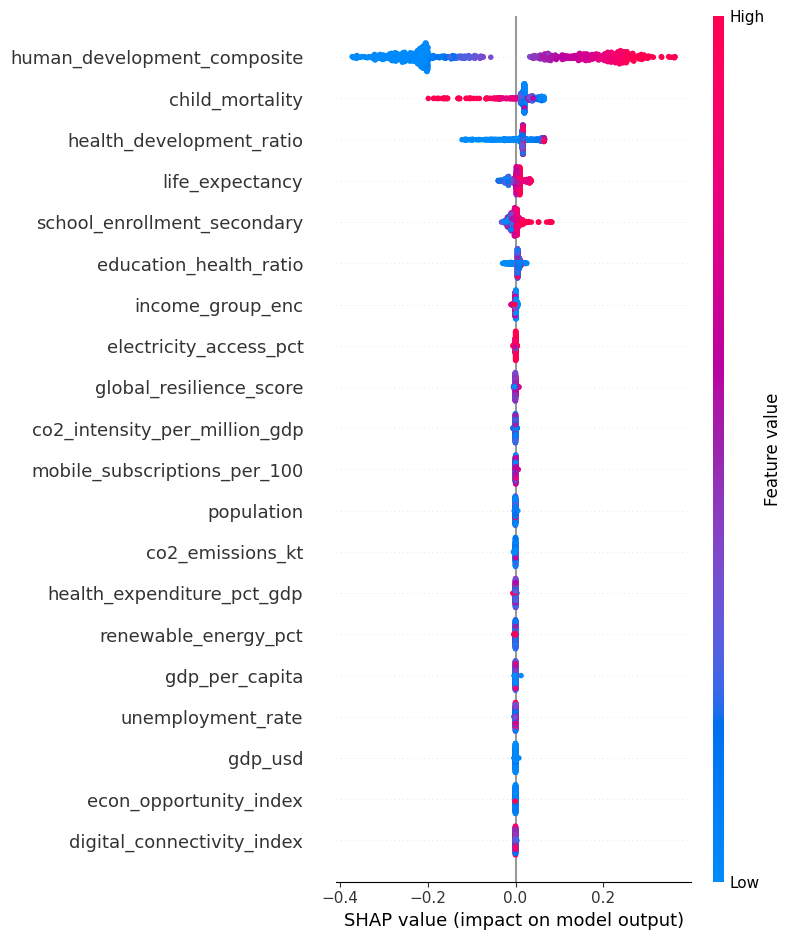

In [58]:
# Separate features and target
X = df_countries_analysis.drop(columns=['human_development_index'])
y = df_countries_analysis['human_development_index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate with MAE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test R²: {r2:.4f}')

# SHAP explanation
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [59]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best params:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


Test MAE: 0.0033
Test RMSE: 0.0062
Test R²: 0.9995


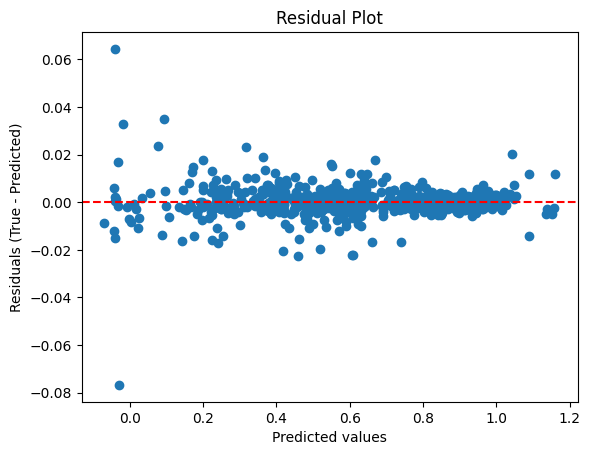

In [60]:
# Assuming random_search is done and best_params are available
best_params = random_search.best_params_

# Initialize model with best params
model = xgb.XGBRegressor(**best_params, random_state=42)

# Train the model on the full training set
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test R²: {r2:.4f}')

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()

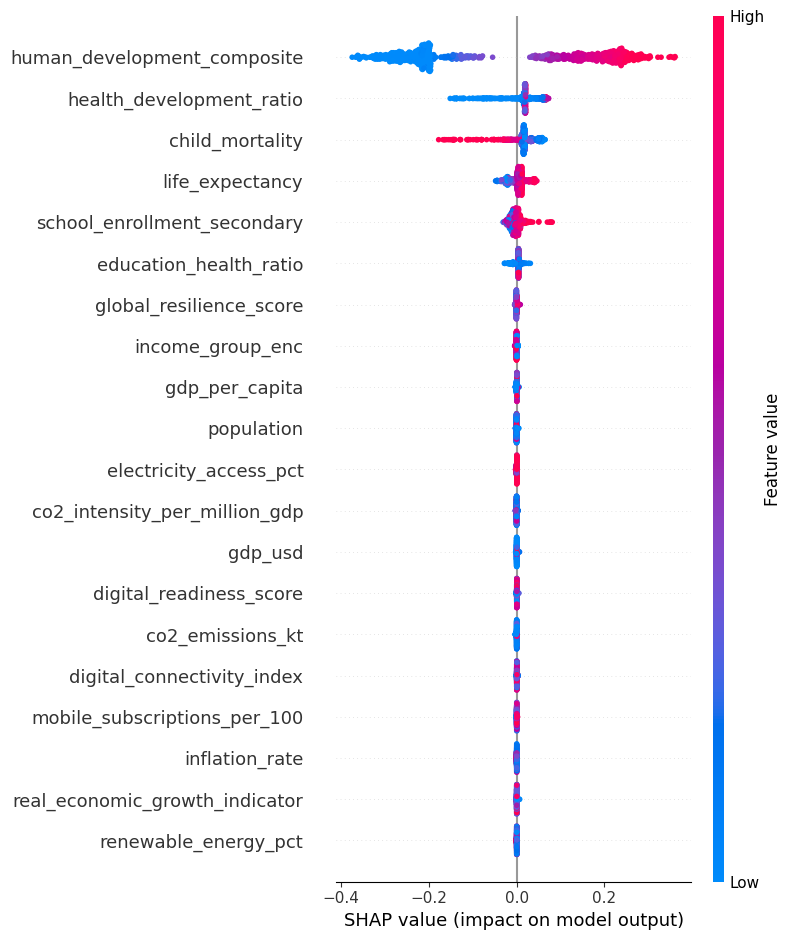

In [61]:
# Create SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

In [62]:
# Save the model to a file
joblib.dump(model, '/Users/root/Global_Development_Analysis/models/xgb_model.joblib')

['/Users/root/Global_Development_Analysis/models/xgb_model.joblib']

# KMeans Clustering Analysis

In [63]:
# DataFrame for cluster analysis
df_countries_cluster_analysis

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,energy_use_per_capita,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,hospital_beds_per_1000,physicians_per_1000,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,renewable_energy_efficiency,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
1008,2000,ASM,American Samoa,East Asia & Pacific,Upper middle income,NaN,57816.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,88.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.445115,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0,0,0,NaN,0.278375,0.011484,NaN
1009,2001,ASM,American Samoa,East Asia & Pacific,Upper middle income,NaN,58496.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,88.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.685848,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1,1,0,NaN,0.278750,0.012286,NaN
1010,2002,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.120000e+08,59077.0,8666.655382,NaN,NaN,NaN,NaN,NaN,0.000000,88.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.446175,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,2,2,0,NaN,0.279125,0.011487,NaN
1011,2003,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.240000e+08,59495.0,8807.462812,NaN,NaN,NaN,NaN,NaN,0.000000,88.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.529175,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3,3,0,NaN,0.279500,0.011764,NaN
1012,2004,ASM,American Samoa,East Asia & Pacific,Upper middle income,5.090000e+08,59684.0,8528.248777,NaN,NaN,NaN,NaN,NaN,0.000000,88.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770044,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,4,4,0,NaN,0.279875,0.012567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,2.054868e+10,14030338.0,1464.588957,-1.543670,4.788,1.669274,10990.0,NaN,82.792603,45.570273,39.676228,60.294,58.7,NaN,7.675163,NaN,0.1788,23.119989,91.793458,-948.771004,669.327517,0.783303,0.534828,82.792603,4.146459,NaN,0.0,0.0,4.606803,1.027155,NaN,16,16,0,0.370373,0.179093,0.421578,0.375164
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.758489e+10,14236599.0,1235.189032,0.893962,4.785,1.746885,10230.0,NaN,83.492996,45.451183,40.144283,60.812,57.0,NaN,7.469752,NaN,0.1859,24.400000,98.985073,1381.701454,564.667071,0.718570,0.581749,83.492996,4.153079,NaN,0.0,0.0,4.914505,1.066877,NaN,17,17,0,0.377994,0.177640,0.451950,0.365426
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.811554e+10,14438812.0,1254.642265,10.618866,4.796,3.962704,12270.0,NaN,81.363602,45.332093,40.616360,61.195,54.8,NaN,8.680062,NaN,0.2096,25.000000,89.404869,118.152191,572.901984,0.849793,0.677319,81.363602,4.089035,NaN,0.0,0.0,4.727707,1.116697,NaN,18,18,0,0.386741,0.183261,0.423016,0.343432
5554,2019,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,1.928429e+10,14645473.0,1316.740657,255.304991,4.833,1.293799,NaN,NaN,NaN,45.213002,41.089108,61.490,54.2,NaN,7.703565,NaN,NaN,25.100000,90.102290,5.157520,598.951752,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,4.755594,1.134502,NaN,19,19,0,0.389866,0.386967,0.425841,0.513916


In [64]:
# Drop unnecessary columns for clustering
df_countries_cluster_analysis = df_countries_cluster_analysis.drop(['hospital_beds_per_1000', 'physicians_per_1000', 'renewable_energy_efficiency', 'energy_use_per_capita'], axis=1)

In [65]:
# List of Tier 2 and Tier 3 columns
tier2_cols = [
    'gdp_usd', 'gdp_per_capita', 'inflation_rate', 'unemployment_rate',
    'fdi_pct_gdp', 'co2_emissions_kt', 'renewable_energy_pct',
    'forest_area_pct', 'electricity_access_pct', 'life_expectancy',
    'child_mortality', 'health_expenditure_pct_gdp', 'internet_usage_pct',
    'mobile_subscriptions_per_100', 'co2_emissions_per_capita_tons',
    'co2_intensity_per_million_gdp'
]

tier3_cols = [
    'school_enrollment_secondary', 'real_economic_growth_indicator',
    'econ_opportunity_index', 'green_transition_score',
    'ecological_preservation_index', 'human_development_composite',
    'healthcare_capacity_index', 'health_development_ratio', 'human_development_index',
    'education_health_ratio', 'global_resilience_score'
]

all_cols = tier2_cols + tier3_cols

# Step 1: Make sure columns are numeric to avoid dtype issues
df_countries_cluster_analysis[all_cols] = df_countries_cluster_analysis[all_cols].apply(pd.to_numeric, errors='coerce')

# Step 2: Interpolate missing values group-wise by country_code
for col in all_cols:
    df_countries_cluster_analysis[col] = df_countries_cluster_analysis.groupby('country_code')[col]\
                            .transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Step 3: Fill any remaining NaNs with median value of the region group
for col in all_cols:
    region_medians = df_countries_cluster_analysis.groupby('region')[col].transform('median')
    df_countries_cluster_analysis[col] = df_countries_cluster_analysis[col].fillna(region_medians)

In [66]:
# Step 1: Fill forward/backward within each country, then infer best dtype
df_countries_cluster_analysis['income_group'] = df_countries_cluster_analysis.groupby('country_code')['income_group']\
    .transform(lambda x: x.ffill().bfill().infer_objects())

# Step 2: Precompute region mode for income_group
region_mode_map = df_countries_cluster_analysis.groupby('region')['income_group'] \
                    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill remaining NaNs in income_group using region mode
mask = df_countries_cluster_analysis['income_group'].isna()
df_countries_cluster_analysis.loc[mask, 'income_group'] = df_countries_cluster_analysis.loc[mask, 'region'].map(region_mode_map)

# Check how many nulls remain per column
print(df_countries_cluster_analysis.isna().sum())
print(df_countries_cluster_analysis.shape)

year                              0
country_code                      0
country_name                      0
region                            0
income_group                      0
gdp_usd                           0
population                        0
gdp_per_capita                    0
inflation_rate                    0
unemployment_rate                 0
fdi_pct_gdp                       0
co2_emissions_kt                  0
renewable_energy_pct              0
forest_area_pct                   0
electricity_access_pct            0
life_expectancy                   0
child_mortality                   0
school_enrollment_secondary       0
health_expenditure_pct_gdp        0
internet_usage_pct                0
mobile_subscriptions_per_100      0
real_economic_growth_indicator    0
econ_opportunity_index            0
co2_emissions_per_capita_tons     0
co2_intensity_per_million_gdp     0
green_transition_score            0
ecological_preservation_index     0
human_development_composite 

In [67]:
# Detect outliers for df_countries_cluster_analysis
numeric_cols_countries = df_countries_cluster_analysis.select_dtypes(include='number').columns
outliers_countries = {}

for col in numeric_cols_countries:
    outliers = detect_outliers_iqr(df_countries_cluster_analysis, col)
    if not outliers.empty:
        outliers_countries[col] = outliers

print("\nOutlier counts for df_countries_cluster_analysis:")
for col, outliers in outliers_countries.items():
    print(f"{col}: {len(outliers)} outliers")


Outlier counts for df_countries_cluster_analysis:
gdp_usd: 728 outliers
population: 533 outliers
gdp_per_capita: 412 outliers
inflation_rate: 355 outliers
unemployment_rate: 284 outliers
fdi_pct_gdp: 453 outliers
co2_emissions_kt: 679 outliers
electricity_access_pct: 336 outliers
life_expectancy: 100 outliers
child_mortality: 314 outliers
school_enrollment_secondary: 2 outliers
health_expenditure_pct_gdp: 85 outliers
mobile_subscriptions_per_100: 17 outliers
real_economic_growth_indicator: 931 outliers
econ_opportunity_index: 643 outliers
co2_emissions_per_capita_tons: 260 outliers
co2_intensity_per_million_gdp: 412 outliers
ecological_preservation_index: 198 outliers
healthcare_capacity_index: 867 outliers
health_development_ratio: 268 outliers
education_health_ratio: 322 outliers
is_pandemic_period: 216 outliers
human_development_index: 12 outliers
digital_readiness_score: 3 outliers
global_resilience_score: 284 outliers


In [68]:
# Winsorize and robust scale numeric columns in df_countries_cluster_analysis
from scipy.stats.mstats import winsorize

# Select numeric columns
numeric_cols = df_countries_cluster_analysis.select_dtypes(include=[np.number]).columns

# Winsorize each numeric column 
df_winsorized = df_countries_cluster_analysis.copy()
for col in numeric_cols:
    col_data = df_winsorized[col].values
    # Winsorize 
    winsorized_col = winsorize(col_data, limits=[0.05, 0.05])
    df_winsorized[col] = winsorized_col

# Robust scaling
scaler = RobustScaler()
df_scaled = df_winsorized.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_winsorized[numeric_cols])

# Show the head of the scaled dataframe
df_scaled.head()

,year,country_code,country_name,region,income_group,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
1008,-0.9,ASM,American Samoa,East Asia & Pacific,Upper middle income,-0.151283,-0.287344,0.200380,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.925651,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.9,-0.9,0.0,-0.049945,-0.537641,-0.587451,-0.068952
1009,-0.9,ASM,American Samoa,East Asia & Pacific,Upper middle income,-0.151283,-0.287309,0.200380,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.922714,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.9,-0.9,0.0,-0.049945,-0.535367,-0.585985,-0.068952
1010,-0.8,ASM,American Samoa,East Asia & Pacific,Upper middle income,-0.151283,-0.287279,0.200380,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.925638,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.8,-0.8,0.0,-0.049945,-0.533092,-0.587445,-0.068952
1011,-0.7,ASM,American Samoa,East Asia & Pacific,Upper middle income,-0.151163,-0.287257,0.208289,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.924626,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.7,-0.7,0.0,-0.049945,-0.530817,-0.586939,-0.068952
1012,-0.6,ASM,American Samoa,East Asia & Pacific,Upper middle income,-0.151313,-0.287248,0.192606,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.921687,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.6,-0.6,0.0,-0.049945,-0.528543,-0.585472,-0.068952


In [69]:
# Detect outliers for df_scaled
numeric_cols_countries = df_scaled.select_dtypes(include='number').columns
outliers_countries = {}

for col in numeric_cols_countries:
    outliers = detect_outliers_iqr(df_scaled, col)
    if not outliers.empty:
        outliers_countries[col] = outliers

print("\nOutlier counts for df_scaled:")
for col, outliers in outliers_countries.items():
    print(f"{col}: {len(outliers)} outliers")


Outlier counts for df_scaled:
gdp_usd: 728 outliers
population: 533 outliers
gdp_per_capita: 412 outliers
inflation_rate: 346 outliers
unemployment_rate: 284 outliers
fdi_pct_gdp: 392 outliers
co2_emissions_kt: 679 outliers
electricity_access_pct: 336 outliers
child_mortality: 314 outliers
real_economic_growth_indicator: 731 outliers
econ_opportunity_index: 643 outliers
co2_emissions_per_capita_tons: 260 outliers
co2_intensity_per_million_gdp: 412 outliers
healthcare_capacity_index: 867 outliers
health_development_ratio: 268 outliers
education_health_ratio: 322 outliers


In [70]:
# Drop non-numeric columns
drop_cols = ['year', 'country_code', 'country_name', 'region', 'income_group']
df_kmeans = df_scaled.drop(columns=[col for col in drop_cols if col in df_scaled], errors='ignore').copy()

df_kmeans.head()

,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score
1008,-0.151283,-0.287344,0.200380,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.925651,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.9,-0.9,0.0,-0.049945,-0.537641,-0.587451,-0.068952
1009,-0.151283,-0.287309,0.200380,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.922714,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.9,-0.9,0.0,-0.049945,-0.535367,-0.585985,-0.068952
1010,-0.151283,-0.287279,0.200380,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.925638,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.8,-0.8,0.0,-0.049945,-0.533092,-0.587445,-0.068952
1011,-0.151163,-0.287257,0.208289,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.924626,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.7,-0.7,0.0,-0.049945,-0.530817,-0.586939,-0.068952
1012,-0.151313,-0.287248,0.192606,-0.141537,-0.518282,-0.08498,-0.036048,-0.407822,1.075373,-0.028018,-0.128788,0.137349,-0.048312,-0.347982,-0.016841,-0.921687,0.0,0.144659,-0.103932,0.227004,-0.407822,-0.440415,-0.268823,0.0,-0.420263,-0.108108,-0.106007,-0.6,-0.6,0.0,-0.049945,-0.528543,-0.585472,-0.068952


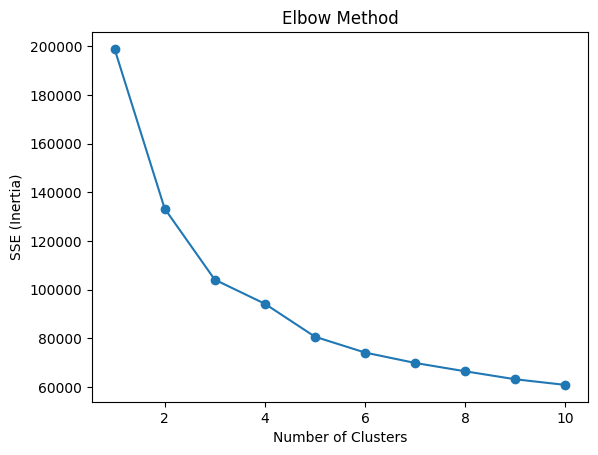

In [71]:
# Kmweans clustering to find optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_kmeans)
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()

In [72]:
# KMeans clustering to find optimal number of clusters using Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_kmeans)
    score = silhouette_score(df_kmeans, labels)
    print(f"Silhouette score for k={k}: {score:.4f}")

Silhouette score for k=2: 0.5195
Silhouette score for k=3: 0.3305
Silhouette score for k=4: 0.2973
Silhouette score for k=5: 0.2188
Silhouette score for k=6: 0.2114
Silhouette score for k=7: 0.2077
Silhouette score for k=8: 0.2104
Silhouette score for k=9: 0.2038
Silhouette score for k=10: 0.2085


In [73]:
# KMeans clustering with k=2 
k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_kmeans)

# Add cluster labels to original dataframe
df_scaled['cluster'] = clusters
df_result = df_scaled.copy()
df_result[['country_code', 'country_name', 'region', 'income_group']] = df_countries_cluster_analysis[['country_code', 'country_name', 'region', 'income_group']]

In [74]:
# Only keep numeric columns for profiling
numeric_cols_only = df_result.select_dtypes(include='number').columns

cluster_profiles = df_result[numeric_cols_only].groupby(df_result['cluster']).median()

cluster_profiles

,year,gdp_usd,population,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,co2_emissions_kt,renewable_energy_pct,forest_area_pct,electricity_access_pct,life_expectancy,child_mortality,school_enrollment_secondary,health_expenditure_pct_gdp,internet_usage_pct,mobile_subscriptions_per_100,real_economic_growth_indicator,econ_opportunity_index,co2_emissions_per_capita_tons,co2_intensity_per_million_gdp,green_transition_score,ecological_preservation_index,human_development_composite,healthcare_capacity_index,digital_connectivity_index,health_development_ratio,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,global_resilience_score,cluster
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,-0.030459,-0.057682,-0.041295,0.029390,0.015838,0.060395,-0.034885,0.058333,-0.011055,-0.024284,-0.058211,0.057831,-0.048312,-0.027454,-0.036283,-0.052202,0.000000,-0.085330,-0.005595,0.000000,0.058333,0.000877,-0.140478,0.000000,-0.080160,-0.040427,-0.053093,0.0,0.0,0.0,-0.037125,-0.040576,-0.052294,-0.047785,0.0
1,0.1,12.588259,3.161864,1.049478,-0.121658,-0.169205,-0.267430,8.976016,-0.189180,0.019483,0.025525,0.526013,-0.332530,0.355425,0.728237,0.678042,0.278099,1.295395,1.585159,1.043356,-0.045975,-0.189180,-0.005038,0.651013,1.085674,0.692472,1.167022,1.134471,0.1,0.1,0.0,0.675683,0.156567,0.620433,0.814427,1.0


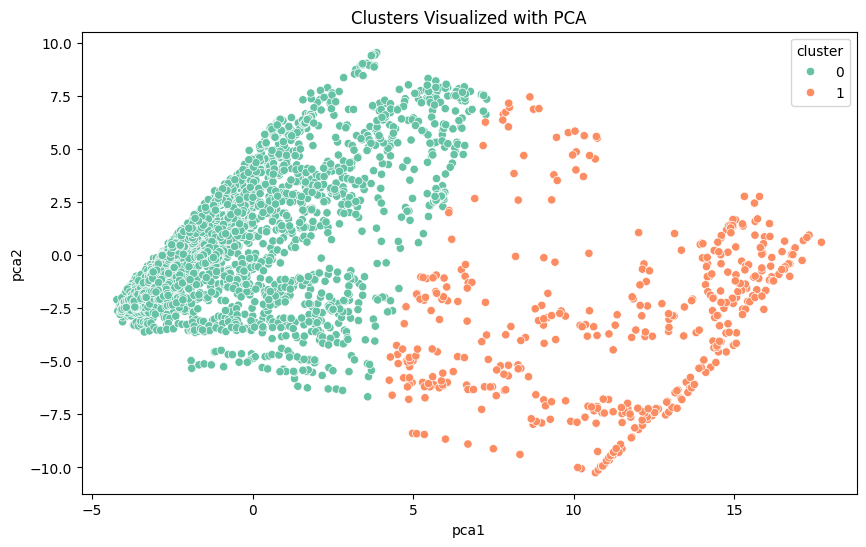

In [75]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_kmeans)

df_result['pca1'] = pca_result[:, 0]
df_result['pca2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_result, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clusters Visualized with PCA')
plt.show()

In [76]:
# Print cluster profiles and countries in each cluster
for c in range(k):
    print(f"\nCluster {c} countries:")
    print(df_result[df_result['cluster'] == c]['country_name'].values)

df_result.to_csv("/Users/root/Global_Development_Analysis/data/clustered_countries.csv", index=False)


Cluster 0 countries:
['American Samoa' 'American Samoa' 'American Samoa' ... 'Zimbabwe'
 'Zimbabwe' 'Zimbabwe']

Cluster 1 countries:
['Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia'
 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia'
 'Indonesia' 'Indonesia' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan'
 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan'
 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Japan' 'Korea' 'Korea' 'Korea'
 'Korea' 'Korea' 'Korea' 'Korea' 'Korea' 'Korea' 'Korea' 'Korea' 'Korea'
 